### Import required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load Data

In [2]:
df = pd.read_csv("F:/ZS/Data Sets/train.csv")

In [3]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1157 non-null   object
 1   AUTHOR      1157 non-null   object
 2   DATE        1019 non-null   object
 3   CONTENT     1157 non-null   object
 4   CLASS       1157 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 45.3+ KB


In [5]:
df.describe()  

,CLASS
count,1157.000000
mean,0.506482
std,0.500174
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
print(df.shape)

(1157, 5)


In [7]:
print(df.isna().sum())

COMMENT_ID      0
AUTHOR          0
DATE          138
CONTENT         0
CLASS           0
dtype: int64


In [8]:
import matplotlib.pyplot as plt 

1    586
0    571
Name: CLASS, dtype: int64

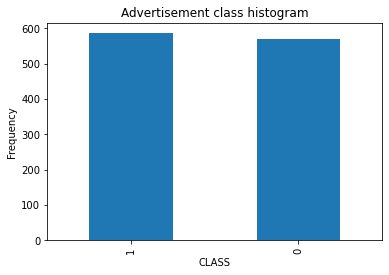

In [9]:
pd.value_counts(df['CLASS']).plot.bar()
plt.title('Advertisement class histogram')
plt.xlabel('CLASS')
plt.ylabel('Frequency')
df['CLASS'].value_counts()

In [10]:
# Actual replacement of the missing value using mean value.
df["DATE"] = df["DATE"].fillna((df["DATE"].mode()))
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [11]:
print(df.isna().sum())

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
dtype: int64


In [12]:
## Get the Independent Features

X=df.drop('CLASS',axis=1)

In [13]:
## Get the Dependent features
y=df['CLASS']

In [14]:
X.shape, y.shape

((1157, 4), (1157,))

In [15]:
import tensorflow as tf

In [16]:
tf.__version__

'2.3.0'

In [17]:
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [18]:
### Vocabulary size
voc_size=20

### Onehot Representation

In [19]:
messages=X.copy()

In [20]:
messages['CONTENT'][1]

'me shaking my sexy ass on my channel enjoy ^_^ \ufeff'

In [21]:
messages.reset_index(inplace=True)

In [22]:
import nltk
import re
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Anoop
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    ##print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['CONTENT'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus

['huh anyway check tube channel kobyoshi',
 'shake sexi ass channel enjoy',
 'watch v vtarggvgtwq check',
 'subscrib channel',
 'u check channel tell next',
 'start read stop subscrib within one day entir famili die want stay aliv subscrib right',
 'http twitter com gbphotographygb',
 'pleas like http premium easypromosapp com votem',
 'hello like game art video scientif experi tutori lyric video much much pleas check channel subscrib start soon hope abl cover expect also check got far',
 'check view',
 'show auburn pride http www teespr com tigermeathoodi',
 'check channel',
 'hey guy im yr old music produc make chiptun bit music would wonder check bit remix even gangnamstyl bit remix would like check thank',
 'dont even watch anymor come check billion',
 'subscrib free android game app',
 'everyon pleas come check newest song memori martin luther king jr',
 'sub channel reason',
 'check dubstep song firebal made fruiti loop realli took time watch v teloa rio',
 'billion come soon',
 

In [26]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4, 15, 13, 5, 3, 8],
 [16, 19, 1, 3, 4],
 [1, 15, 12, 13],
 [13, 3],
 [14, 13, 3, 15, 15],
 [10, 15, 5, 13, 17, 4, 6, 16, 16, 17, 1, 18, 18, 13, 1],
 [8, 4, 13, 15],
 [1, 6, 8, 15, 8, 13, 6],
 [4,
  6,
  11,
  2,
  13,
  19,
  13,
  1,
  17,
  13,
  1,
  1,
  1,
  13,
  3,
  13,
  10,
  12,
  14,
  17,
  18,
  18,
  11,
  13,
  5,
  7],
 [13, 2],
 [10, 4, 3, 8, 12, 2, 13, 11],
 [13, 3],
 [12,
  2,
  19,
  5,
  8,
  19,
  2,
  5,
  5,
  5,
  19,
  2,
  12,
  13,
  5,
  10,
  15,
  5,
  5,
  10,
  2,
  6,
  13,
  15],
 [4, 15, 1, 6, 6, 13, 19],
 [13, 19, 3, 11, 17],
 [15, 1, 6, 13, 12, 1, 15, 18, 6, 18, 5],
 [2, 3, 14],
 [13, 2, 1, 19, 18, 10, 12, 11, 11, 5, 1, 15, 14, 16],
 [19, 6, 12],
 [2, 19, 10, 13, 13, 1],
 [6, 11, 16, 2, 5, 12, 18, 8, 3],
 [8, 12, 4, 13, 18, 6, 14, 1, 6],
 [2, 12, 4, 2, 3, 15, 13, 13],
 [8, 12, 7, 5, 7, 13, 2, 11, 13, 3, 3, 11, 6, 9, 1, 1, 15],
 [18, 13, 2],
 [17, 14, 13, 13, 17, 13, 2, 5],
 [9, 13, 3, 13, 1, 11],
 [13, 1, 17, 16, 13, 14, 2, 18, 1, 6],
 [8, 12, 

### Embedding Representation

In [27]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 0  0  0 ...  5  3  8]
 [ 0  0  0 ...  1  3  4]
 [ 0  0  0 ... 15 12 13]
 ...
 [ 0  0  0 ... 14 14 13]
 [ 0  0  0 ...  0  0 17]
 [ 0  0  0 ...  9 14  9]]


In [28]:
embedded_docs[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 15, 13,
        5,  3,  8])

In [29]:
#We have used embedding layers with LSTM
model = Sequential()
model.add(Embedding(voc_size,40,input_length=25))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 40)            800       
_________________________________________________________________
dropout (Dropout)            (None, 25, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [30]:
len(embedded_docs),y.shape

(1157, (1157,))

In [31]:
X_final=np.array(embedded_docs)
X_train_final  = X_final[:1157]

X_test_final   = X_final[1157:]
y_final = np.array(y)
X_test_final.shape

(0, 20)

In [32]:
X_final.shape,y_final.shape

((1157, 20), (1157,))

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_train_final ,y_final ,test_size=0.33,random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((775, 20), (382, 20), (775,), (382,))

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
13/13 [==============================] - 1s 91ms/step - loss: 0.6858 - accuracy: 0.5329 - val_loss: 0.6681 - val_accuracy: 0.6649
Epoch 2/20
13/13 [==============================] - 0s 19ms/step - loss: 0.6549 - accuracy: 0.6723 - val_loss: 0.6123 - val_accuracy: 0.6545
Epoch 3/20
13/13 [==============================] - 0s 19ms/step - loss: 0.5897 - accuracy: 0.6800 - val_loss: 0.5769 - val_accuracy: 0.7042
Epoch 4/20
13/13 [==============================] - 0s 17ms/step - loss: 0.5601 - accuracy: 0.6968 - val_loss: 0.5294 - val_accuracy: 0.7042
Epoch 5/20
13/13 [==============================] - 0s 22ms/step - loss: 0.5276 - accuracy: 0.7497 - val_loss: 0.5009 - val_accuracy: 0.7723
Epoch 6/20
13/13 [==============================] - 0s 23ms/step - loss: 0.4915 - accuracy: 0.7794 - val_loss: 0.4627 - val_accuracy: 0.7749
Epoch 7/20
13/13 [==============================] - 0s 26ms/step - loss: 0.4729 - accuracy: 0.7897 - val_loss: 0.4732 - val_accuracy: 0.7827
Epoch 8/20
13

### Performance Metrics And Accuracy

In [36]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[126,  60],
       [ 14, 182]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.806282722513089

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_test,y_test)
roc_auc_score(y_test, clf.decision_function(X_test))

0.7994980250164581

## Predictions

In [41]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [42]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

In [43]:
def fake_comments(sample_comments):
  sample_comments = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_comments)
  sample_comments = sample_comments.lower()
  sample_comments_words = sample_comments.split()
  sample_comments_words = [word for word in sample_comments_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_comments = [ps.stem(word) for word in sample_comments_words]
  final_comments = ' '.join(final_comments)

  temp = cv.transform([final_comments]).toarray()
  return classifier.predict(temp)

In [44]:
# Importing test dataset
df_test = pd.read_csv('F:/ZS/Data Sets/test.csv')

In [45]:
df_test.columns

Index(['ID', 'COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT'], dtype='object')

In [46]:
adv_CONTENT = df_test['CONTENT']
adv_CONTENT.shape

(799,)

In [48]:
# For generating random integer
from random import randint

In [49]:
row = randint(0,adv_CONTENT.shape[0]-1)
sample_contents = adv_CONTENT[row]
sample_contents

"Hi everyone! Do you like music? Then why not check out my music channel.  The LEXIS band will be uploading their own songs and covers soon so don't  miss out. Please SUBSCRIBE too as it does help us out a lot. Just takes one  click. -&gt;\ufeff"

In [50]:
# Predicting values
row = randint(0,adv_CONTENT.shape[0]-1)
sample_contents = adv_CONTENT[row]

print('News: {}'.format(sample_contents))
if fake_comments(sample_contents):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Check out my mummy chanel!
Prediction: This is a REAL news.


In [53]:
prediction=[]
for i in range(0, len(adv_CONTENT)):
    row = randint(0,adv_CONTENT.shape[0]-1)
    sample_contents = adv_CONTENT[row]
    if fake_comments(sample_contents):
        prediction.append(1)
    else:
        prediction.append(0)

In [54]:
len(prediction)

799

In [55]:
prediction.count(0)

797

In [56]:
prediction.count(1)

2